In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
main_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YT_Videos_data.csv')

In [ ]:
main_df.head()

,Unnamed: 0,Title,Description,Category
0,0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,travel
1,1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,travel
2,2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel
3,3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",travel
4,4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,travel


In [ ]:
main_df=main_df.iloc[:,1:]

In [ ]:
main_df.head()

,Title,Description,Category
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,travel
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,travel
2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel
3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",travel
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,travel


In [ ]:
main_df.shape

(3437, 3)

In [ ]:
main_df.isnull().sum()

Title            0
Description    333
Category         0
dtype: int64

In [ ]:
main_df=main_df.dropna()

In [ ]:
main_df.isnull().sum()

Title          0
Description    0
Category       0
dtype: int64

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 0 to 3435
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3104 non-null   object
 1   Description  3104 non-null   object
 2   Category     3104 non-null   object
dtypes: object(3)
memory usage: 97.0+ KB


In [ ]:
main_df.duplicated().sum()

607

In [ ]:
main2_df =main_df.drop_duplicates(keep='first')

In [ ]:
main2_df.duplicated().sum()

0

In [ ]:
main2_df.shape

(2497, 3)

In [ ]:
main_df['Category'].value_counts()

travel           1050
technology        551
food              538
art and music     517
sports            448
Name: Category, dtype: int64

In [ ]:
main2_df['Category'].value_counts()

travel           561
technology       512
art and music    504
food             495
sports           425
Name: Category, dtype: int64

In [ ]:
main2_df['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='No. of Samples', title='No. of samples for each class')

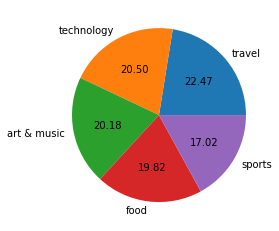

In [ ]:
import matplotlib.pyplot as plt
plt.pie(main2_df['Category'].value_counts(), labels=['travel','technology','art & music','food','sports'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
main2_df['Title_num_words'] =main2_df['Title'].apply(lambda x:len(nltk.word_tokenize(x)))
main2_df['Description_num_words'] =main2_df['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
main2_df.head()

,Title,Description,Category,Title_num_words,Description_num_words
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,travel,16,33
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,travel,21,30
2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel,10,24
3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",travel,5,24
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,travel,24,24


In [ ]:
main2_df['Title_num_sentences'] =main2_df['Title'].apply(lambda x:len(nltk.sent_tokenize(x)))
main2_df['Description_num_sentences'] =main2_df['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
main2_df.head()

,Title,Description,Category,Title_num_words,Description_num_words,Title_num_sentences,Description_num_sentences
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,travel,16,33,2,3
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,travel,21,30,1,2
2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel,10,24,2,1
3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",travel,5,24,1,2
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,travel,24,24,1,1


In [ ]:
#main2_df['num_characters'] = main2_df['Title'].apply(len)
main2_df['Desc_num_characters'] = main2_df['Description'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
main2_df.head()

,Title,Description,Category,Title_num_words,Description_num_words,Title_num_sentences,Description_num_sentences,Desc_num_characters
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,travel,16,33,2,3,133
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,travel,21,30,1,2,141
2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel,10,24,2,1,127
3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",travel,5,24,1,2,119
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,travel,24,24,1,1,137


In [1]:
#main2_df[['num_characters','Title_num_words','Title_num_sentences']].describe()

In [ ]:
main2_df[['Desc_num_characters','Description_num_words','Description_num_sentences']].describe()

,Desc_num_characters,Description_num_words,Description_num_sentences
count,2497.000000,2497.000000,2497.000000
mean,115.855827,21.430116,1.513416
std,23.797339,6.324557,0.788489
min,3.000000,2.000000,1.000000
25%,114.000000,18.000000,1.000000
50%,124.000000,22.000000,1.000000
75%,130.000000,25.000000,2.000000
max,146.000000,58.000000,14.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
main2_df['Category'] = encoder.fit_transform(main2_df['Category'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
main2_df['Category'].unique()

array([4, 3, 1, 0, 2])

In [ ]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'art and music': 0, 'food': 1, 'sports': 2, 'technology': 3, 'travel': 4}


In [ ]:
le_name_mapping.keys()

dict_keys(['art and music', 'food', 'sports', 'technology', 'travel'])

In [ ]:
le_name_mapping.values()

dict_values([0, 1, 2, 3, 4])

In [ ]:
show=pd.DataFrame({"Category":le_name_mapping.keys(),"Encoded Values":le_name_mapping.values()})
display(show)

,Category,Encoded Values
0,art and music,0
1,food,1
2,sports,2
3,technology,3
4,travel,4


In [ ]:
main2_df[main2_df['Category'] == 2][['num_characters','Title_num_words','Title_num_sentences']].describe()

,num_characters,Title_num_words,Title_num_sentences
count,425.000000,425.000000,425.000000
mean,80.682353,15.397647,1.065882
std,16.457931,3.782968,0.248369
min,18.000000,3.000000,1.000000
25%,70.000000,13.000000,1.000000
50%,83.000000,15.000000,1.000000
75%,95.000000,18.000000,1.000000
max,111.000000,29.000000,2.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


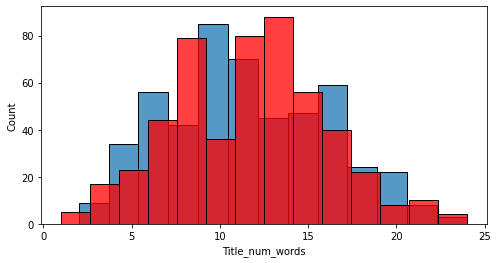

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(main2_df[main2_df['Category'] == 0]['Title_num_words'])
sns.histplot(main2_df[main2_df['Category'] == 3]['Title_num_words'],color='red')

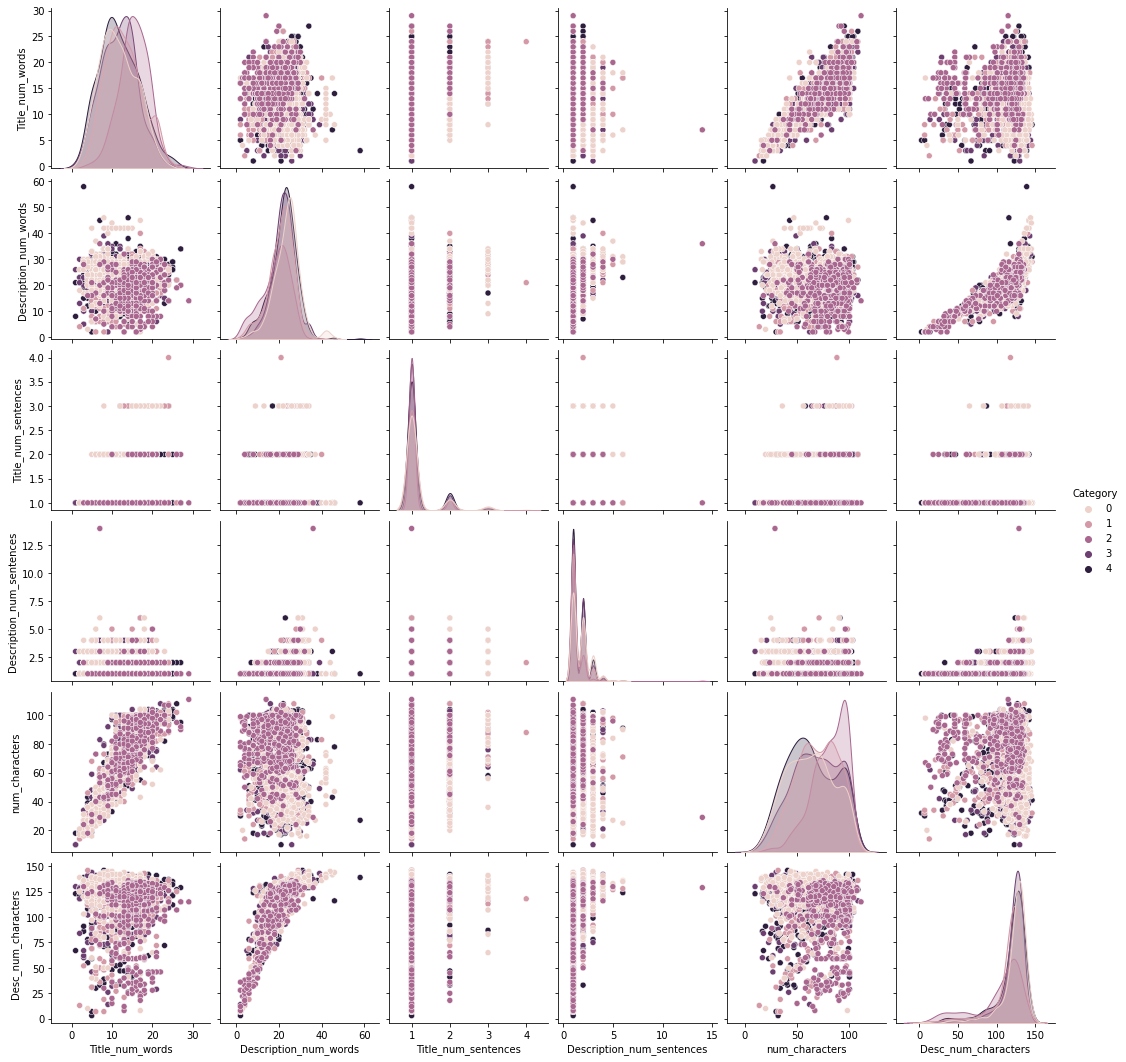

In [ ]:
sns.pairplot(main2_df,hue='Category')

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
main2_df['transformed_title'] = main2_df['Title'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
main2_df['transformed_Desc'] = main2_df['Description'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
main2_df[['Title','transformed_title','Description','transformed_Desc']]

,Title,transformed_title,Description,transformed_Desc
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,pari travel vlog indian girl travel solo pari ...,Bonjour from Paris! I'm on a one month long so...,bonjour pari one month long solo trip europ st...
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,lakshadweep travel vlog travel lakshadweep bud...,Here's the first part of my 4 part travel seri...,first part 4 part travel seri cover beauti isl...
2,Traveling to the Happiest Country in the World!!,travel happiest countri world,BLACK FRIDAY DROP Out Now*: http://seek-discom...,black friday drop http week everi purchas 35 get
3,Lonavala - Traveling in Monsoon,lonavala travel monsoon,"I travelled to lonavala, korigad, aamby valley...",travel lonavala korigad aambi valley near pune...
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,becam travel vlogger make money even 39 start ...,The first 1000 people to use the link will get...,first 1000 peopl use link get free trial skill...
...,...,...,...,...
3431,MD Sports Amanepada VS Shiv Shani Devrungpada ...,md sport amanepada vs shiv shani devrungpada m...,GTC_Live_7718941713 #gtclive.in #gtc #gtclive ...,gtc gtclive tennisballcricket
3432,Crystal Palace vs. Manchester City [0-0] | Pre...,crystal palac manchest citi premier leagu full...,CRYSTAL PALACE vs. MANCHESTER CITY Premier Lea...,crystal palac manchest citi premier leagu full...
3433,TV9 Marathi Live | Devendra Fadnavis | Maharas...,tv9 marathi live devendra fadnavi maharashtra ...,Vidhan Sabha (Assembly) Election Results 2022 ...,vidhan sabha assembl elect result 2022 live ne...
3434,Pattalam Full Tamil Movie | Nadiya | Roshan Kr...,pattalam full tamil movi nadiya roshan krishna,Director - Rohan Krishna Producer - N. Subash ...,director rohan krishna produc subash chandra b...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
wc1 = wc.generate(main2_df[main2_df['Category'] == 2]['transformed_title'].str.cat(sep=" "))

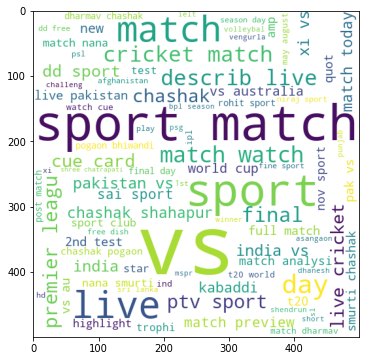

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(wc1)

In [ ]:
main2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497 entries, 0 to 3435
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Title                      2497 non-null   object
 1   Description                2497 non-null   object
 2   Category                   2497 non-null   int64 
 3   Title_num_words            2497 non-null   int64 
 4   Description_num_words      2497 non-null   int64 
 5   Title_num_sentences        2497 non-null   int64 
 6   Description_num_sentences  2497 non-null   int64 
 7   num_characters             2497 non-null   int64 
 8   Desc_num_characters        2497 non-null   int64 
 9   transformed_title          2497 non-null   object
 10  transformed_Desc           2497 non-null   object
dtypes: int64(7), object(4)
memory usage: 298.6+ KB


In [ ]:
main2_df[]

,Title,Description,Category,Title_num_words,Description_num_words,Title_num_sentences,Description_num_sentences,num_characters,Desc_num_characters,transformed_title,transformed_Desc
0,PARIS TRAVEL VLOG | Indian Girl Traveling Solo...,Bonjour from Paris! I'm on a one month long so...,4,16,33,2,3,77,133,pari travel vlog indian girl travel solo pari ...,bonjour pari one month long solo trip europ st...
1,LAKSHADWEEP TRAVEL VLOG | How to Travel to Lak...,Here's the first part of my 4 part travel seri...,4,21,30,1,2,102,141,lakshadweep travel vlog travel lakshadweep bud...,first part 4 part travel seri cover beauti isl...
2,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,4,10,24,2,1,48,127,travel happiest countri world,black friday drop http week everi purchas 35 get
3,Lonavala - Traveling in Monsoon,"I travelled to lonavala, korigad, aamby valley...",4,5,24,1,2,31,119,lonavala travel monsoon,travel lonavala korigad aambi valley near pune...
4,How I Became a TRAVEL VLOGGER | Make Money Eve...,The first 1000 people to use the link will get...,4,24,24,1,1,94,137,becam travel vlogger make money even 39 start ...,first 1000 peopl use link get free trial skill...


In [ ]:
#main3_df = pd.DataFrame({'Title':transformed_title, 'Description':transformed_Desc , 'Category': Category}) 
#main3_df.to_csv('transformed_video_data.csv')

In [ ]:
main3_df=main2_df[['transformed_title','transformed_Desc','Category']]
main3_df.to_csv('transformed_video_data.csv',index=False)


In [ ]:
main3_df.head()

,transformed_title,transformed_Desc,Category
0,pari travel vlog indian girl travel solo pari ...,bonjour pari one month long solo trip europ st...,4
1,lakshadweep travel vlog travel lakshadweep bud...,first part 4 part travel seri cover beauti isl...,4
2,travel happiest countri world,black friday drop http week everi purchas 35 get,4
3,lonavala travel monsoon,travel lonavala korigad aambi valley near pune...,4
4,becam travel vlogger make money even 39 start ...,first 1000 peopl use link get free trial skill...,4


In [ ]:
import numpy as np
import pandas as pd
new_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/transformed_video_data.csv')

In [ ]:
new_df.head()

,transformed_title,transformed_Desc,Category
0,pari travel vlog indian girl travel solo pari ...,bonjour pari one month long solo trip europ st...,4
1,lakshadweep travel vlog travel lakshadweep bud...,first part 4 part travel seri cover beauti isl...,4
2,travel happiest countri world,black friday drop http week everi purchas 35 get,4
3,lonavala travel monsoon,travel lonavala korigad aambi valley near pune...,4
4,becam travel vlogger make money even 39 start ...,first 1000 peopl use link get free trial skill...,4


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
x=''

In [ ]:
new_df=new_df.dropna()

In [ ]:
new_df.shape

(2484, 3)

In [ ]:
new_df.isnull().sum()

transformed_title    0
transformed_Desc     0
Category             0
dtype: int64

In [ ]:
X = tfidf.fit_transform(new_df['transformed_title']).toarray()

In [ ]:
X.shape

(2484, 4950)

In [ ]:
#feature_names=tfidf.get_feature_names()
#for col in X.nonzero():
 # print(feature_names(col)," - ",X[0,col])

In [ ]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X.shape

(2484, 4950)

In [ ]:
#title features
len(tfidf.vocabulary_ )  # unique words

4950

In [ ]:
tfidf.vocabulary_ 

{'pari': 3150,
 'travel': 4436,
 'vlog': 4654,
 'indian': 2052,
 'girl': 1764,
 'solo': 3993,
 'kikiinpari': 2320,
 'ep': 1438,
 'lakshadweep': 2401,
 'budget': 761,
 'accommod': 219,
 'amp': 347,
 'tour': 4408,
 'guid': 1836,
 'happiest': 1881,
 'countri': 1056,
 'world': 4762,
 'lonavala': 2509,
 'monsoon': 2817,
 'becam': 582,
 'vlogger': 4655,
 'make': 2593,
 'money': 2807,
 'even': 1469,
 '39': 135,
 'start': 4100,
 'youtub': 4798,
 'kedarnath': 2273,
 'yatra': 4786,
 '2020': 77,
 'complet': 1013,
 'dham': 1234,
 'siargao': 3908,
 'next': 2957,
 'bali': 520,
 'welcom': 4712,
 'priscilla': 3371,
 'lee': 2444,
 'russia': 3673,
 'walk': 4676,
 'street': 4138,
 'nightlif': 2970,
 'st': 4084,
 'petersburg': 3226,
 'white': 4726,
 'night': 2969,
 'sikkim': 3920,
 'bagdogra': 512,
 'gangtok': 1705,
 'north': 2994,
 'east': 1371,
 'india': 2051,
 'kritika': 2373,
 'goel': 1784,
 'south': 4018,
 'goa': 1777,
 'beyond': 624,
 'beach': 577,
 'tanya': 4252,
 'khanijow': 2300,
 'day': 1162,
 '

In [ ]:
new_df['transformed_title'][0]

'pari travel vlog indian girl travel solo pari kikiinpari ep 1'

In [ ]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '0063',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '098',
 '10',
 '100',
 '101',
 '105e',
 '108',
 '1080',
 '10x',
 '11',
 '111',
 '12',
 '120',
 '1200km',
 '122k',
 '123',
 '123go',
 '12th',
 '13',
 '1313',
 '139',
 '14',
 '144',
 '15',
 '1500',
 '15000',
 '15000r',
 '150w',
 '153',
 '1581',
 '16',
 '17',
 '173',
 '174',
 '175',
 '18',
 '181',
 '182',
 '184',
 '19',
 '1900km',
 '191',
 '195',
 '196',
 '1967',
 '197',
 '199',
 '1994',
 '1998',
 '1j',
 '1st',
 '1to',
 '1xbet',
 '1ère',
 '20',
 '200',
 '2000',
 '2006',
 '2008',
 '201',
 '2011',
 '2012',
 '2014',
 '2015',
 '2017',
 '2018',
 '20180803',
 '2019',
 '2020',
 '2021',
 '2022',
 '2022ielt',
 '2050',
 '2070',
 '20th',
 '21',
 '211',
 '215',
 '21st',
 '22',
 '2200',
 '221',
 '226',
 '227',
 '228',
 '22lr',
 '22nd',
 '23',
 '233',
 '235',
 '236',
 '24',
 '243',
 '24hour',
 '25',
 '25th',
 '26',
 '27',
 '272',
 '28',
 '288',
 '29',
 '293',
 '298',
 '29th',
 '2b2t',
 '2nd',
 '30',
 '3000',
 '3019',
 '30k',
 '31

In [ ]:
X_desc = tfidf.fit_transform(new_df['transformed_Desc'])

In [ ]:
X_desc.shape

(2484, 6548)

In [ ]:
print(X_desc)

  (0, 2207)	0.2625946175742198
  (0, 5370)	0.189119142341212
  (0, 1960)	0.23021818590898196
  (0, 5840)	0.3760636986708152
  (0, 5236)	0.4762055849931011
  (0, 3389)	0.21146884281018202
  (0, 3738)	0.21146884281018202
  (0, 4065)	0.16248519265484346
  (0, 4193)	0.5251892351484396
  (0, 858)	0.2870864426518891
  (1, 4355)	0.3056986014957788
  (1, 5546)	0.2778059781962434
  (1, 6041)	0.13082301028701576
  (1, 3226)	0.3633203280351636
  (1, 2880)	0.3359620018077063
  (1, 697)	0.24391960990888276
  (1, 1412)	0.34349807330143106
  (1, 5042)	0.25869742512301364
  (1, 5806)	0.1586832951064688
  (1, 4199)	0.49443331741464974
  (1, 2120)	0.23092999445394746
  (2, 2317)	0.23385326173844262
  (2, 131)	0.37952580016973864
  (2, 4558)	0.3639865748727316
  (2, 1969)	0.3232713861929752
  :	:
  (2481, 4554)	0.26791774743867797
  (2481, 4765)	0.2569481790018173
  (2481, 3520)	0.294348054232452
  (2481, 3915)	0.19463735623748427
  (2481, 3348)	0.1449258414252694
  (2481, 81)	0.21837495357669925
  (2481

In [ ]:
X_desc.shape

(2484, 6548)

In [ ]:
tfidf.vocabulary_

{'bonjour': 858,
 'pari': 4193,
 'one': 4065,
 'month': 3738,
 'long': 3389,
 'solo': 5236,
 'trip': 5840,
 'europ': 1960,
 'start': 5370,
 'franc': 2207,
 'first': 2120,
 'part': 4199,
 'travel': 5806,
 'seri': 5042,
 'cover': 1412,
 'beauti': 697,
 'island': 2880,
 'lakshadweep': 3226,
 'video': 6041,
 'talk': 5546,
 'plan': 4355,
 'black': 814,
 'friday': 2224,
 'drop': 1770,
 'http': 2651,
 'week': 6154,
 'everi': 1969,
 'purchas': 4558,
 '35': 131,
 'get': 2317,
 'lonavala': 3386,
 'korigad': 3171,
 'aambi': 211,
 'valley': 6000,
 'near': 3886,
 'pune': 4553,
 'creat': 1436,
 'join': 2965,
 'free': 2212,
 'edit': 1841,
 'cours': 1407,
 '1000': 8,
 'peopl': 4260,
 'use': 5984,
 'link': 3334,
 'trial': 5833,
 'skillshar': 5176,
 'premium': 4456,
 'membership': 3603,
 'kedarnath': 3069,
 'kahu': 3016,
 'ya': 6256,
 'swarg': 5496,
 'baat': 601,
 'toh': 5738,
 'ek': 1859,
 'hai': 2478,
 'go': 2351,
 '5th': 162,
 'jyotirlinga': 2997,
 'lord': 3401,
 'shiva': 5103,
 'alway': 391,
 'dream

In [ ]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0063',
 '01151',
 '02',
 '03',
 '062130331102',
 '06360',
 '10',
 '100',
 '1000',
 '10000',
 '100gbp',
 '105e',
 '1080',
 '10dayschalleng',
 '10th',
 '10ème',
 '11',
 '11000',
 '11th',
 '12',
 '122k',
 '122ten',
 '123go',
 '12gb',
 '12th',
 '13',
 '130',
 '1380',
 '13gb',
 '14',
 '1436',
 '14th',
 '15',
 '1500',
 '15000',
 '150mbp',
 '150w',
 '16',
 '17',
 '174',
 '1781',
 '18',
 '181',
 '18th',
 '19',
 '191',
 '1964',
 '1975',
 '1987',
 '1990',
 '1994',
 '1998',
 '19th',
 '1pack',
 '1st',
 '1stclass',
 '1stclassev',
 '1stmatch',
 '1stt20',
 '1tsp',
 '1xbet',
 '1ère',
 '20',
 '200',
 '2000',
 '2001年11月28日',
 '2005',
 '2006',
 '2007',
 '2008',
 '2010',
 '2011',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2022年1月9日よりi',
 '2024',
 '2042',
 '2050',
 '2050world',
 '2070',
 '20m',
 '21',
 '2100',
 '211',
 '215',
 '21st',
 '21th',
 '2200',
 '228',
 '22lr',
 '22nd',
 '22世纪未来科技视觉特效机器人大战weme',
 '23',
 '235',
 '236',
 '24',
 '240',
 '24655',
 '24x

In [ ]:
y =new_df['Category'].values

In [ ]:
y.shape

(2484,)

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
X.shape

(2484, 4950)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_desc_train,X_desc_test,y_desc_train,y_desc_test = train_test_split(X_desc,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train.shape 

(1987, 4950)

In [ ]:
X_test.shape

(497, 4950)

In [ ]:
X_desc_train.shape

(1987, 6548)

In [ ]:
X_desc_test.shape

(497, 6548)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# Title
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Description
gnb_desc = GaussianNB()
mnb_desc = MultinomialNB()
bnb_desc = BernoulliNB()


In [ ]:
from numpy import array
from scipy.sparse import csr_matrix

In [ ]:
# Title
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)


#data_gnb=pd.DataFrame({"Actual":y_test,"Predicted":y_pred1})
#display(data_gnb.head(25))

gnb_t1=accuracy_score(y_train,gnb.predict(X_train))
gnb_t2=accuracy_score(y_test,y_pred1)

print(accuracy_score(y_train,gnb.predict(X_train)))
print(accuracy_score(y_test,y_pred1))

#print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1,average=None))

0.9909411172622044
0.7364185110663984


In [ ]:
# Desc
gnb_desc.fit(X_desc_train.todense(),y_desc_train)
y_pred2 = gnb_desc.predict(X_desc_test.todense())

#data_desc_gnb=pd.DataFrame({"Actual":y_desc_test,"Predicted":y_pred2})
#display(data_desc_gnb.head(25))

#pred=gnb_desc.predict_proba(X_desc_train.todense())
#print(pred)

#gnb_proba=pd.DataFrame({"Predict Proba":[pred]},)
#display(gnb_proba.head(25))

gnb_desc_t1=accuracy_score(y_desc_train,gnb_desc.predict(X_desc_train.todense()))
gnb_desc_t2=accuracy_score(y_desc_test,y_pred2)

print(accuracy_score(y_desc_train,gnb_desc.predict(X_desc_train.todense())))
print(accuracy_score(y_desc_test,y_pred2))
#print(confusion_matrix(y_desc_test,y_pred2))
#print(precision_score(y_desc_test,y_pred2,average=None))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

0.968797181680926
0.7002012072434608


In [ ]:
# Title
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)

#data_mnb=pd.DataFrame({"Actual":y_test,"Predicted":y_pred3})
#display(data_mnb.head(25))

mnb_t1=accuracy_score(y_train,mnb.predict(X_train) )
mnb_t2=accuracy_score(y_test,y_pred3)

print(accuracy_score(y_train,mnb.predict(X_train) ))
print(accuracy_score(y_test,y_pred3))
#print(confusion_matrix(y_test,y_pred3))
#print(precision_score(y_test,y_pred3,average=None))

0.9954705586311021
0.9537223340040242


In [ ]:
# Desc
mnb_desc.fit(X_desc_train,y_desc_train)
y_pred4 = mnb_desc.predict(X_desc_test)

#data_desc_gnb=pd.DataFrame({"Actual":y_desc_test,"Predicted":y_pred4})
#display(data_desc_gnb.head(25))

mnb_desc_t1=accuracy_score(y_desc_train,mnb_desc.predict(X_desc_train) )
mnb_desc_t2=accuracy_score(y_desc_test,y_pred4)


print(accuracy_score(y_desc_train,mnb_desc.predict(X_desc_train) ))
print(accuracy_score(y_desc_test,y_pred4))
#print(confusion_matrix(y_desc_test,y_pred4))
#print(precision_score(y_desc_test,y_pred4,average=None))

0.9607448414695521
0.8048289738430584


In [ ]:
# Title

bnb.fit(X_train,y_train)
y_pred5 = bnb.predict(X_test)

#data_bnb=pd.DataFrame({"Actual":y_test,"Predicted":y_pred5})
#display(data_bnb.head(25))

bnb_t1=accuracy_score(y_train,bnb.predict(X_train) )
bnb_t2=accuracy_score(y_test,y_pred5)

print(accuracy_score(y_train,bnb.predict(X_train) ))
print(accuracy_score(y_test,y_pred5))
#print(confusion_matrix(y_test,y_pred5))
#print(precision_score(y_test,y_pred5,average=None))

0.9914443885254152
0.9798792756539235


In [ ]:
# Desc
bnb_desc.fit(X_desc_train,y_desc_train)
y_pred6 = bnb_desc.predict(X_desc_test)

#data_desc_bnb=pd.DataFrame({"Actual":y_desc_test,"Predicted":y_pred6})
#display(data_desc_bnb.head(25))

bnb_desc_t1=accuracy_score(y_desc_train,bnb_desc.predict(X_desc_train) )
bnb_desc_t2=accuracy_score(y_desc_test,y_pred6)


print(accuracy_score(y_desc_train,bnb_desc.predict(X_desc_train) ))
print(accuracy_score(y_desc_test,y_pred6))
#print(confusion_matrix(y_desc_test,y_pred6))
#print(precision_score(y_desc_test,y_pred6,average=None))

0.9280322093608455
0.7927565392354124


In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
train_title_lst=[gnb_t1,mnb_t1,bnb_t1]
test_title_lst=[gnb_t2,mnb_t2,bnb_t2]

train_desc_lst=[gnb_desc_t1,mnb_desc_t1,bnb_desc_t1]
test_desc_lst=[gnb_desc_t2,mnb_desc_t2,bnb_desc_t2]

In [ ]:
acc_score=pd.DataFrame({"title_Train":train_title_lst,"title_Test":test_title_lst,"desc_Train":train_desc_lst,"desc_Test":test_desc_lst},index=["GNB","MNB","BNB"])

In [ ]:
display(acc_score)

,title_Train,title_Test,desc_Train,desc_Test
GNB,0.990941,0.736419,0.968797,0.700201
MNB,0.995471,0.953722,0.960745,0.804829
BNB,0.991444,0.979879,0.928032,0.792757


In [ ]:
X.shape

(2484, 4950)

In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = gnb.predict(data)
print(output)

Enter a Text:  Danish and rcb find themselves in a very strange situation . They are dependent on the result of the game between mumbai indians and delhi capitals . The game against the gujarat titans is a must-win game for the team . The team are looking to qualify for the playoffs .\', " rcb does have a tall order lined up and who better than griff to talk to us about this challenge the baseballers have been brilliant in parts and uh sometimes the execution hasn\'t come off when we play an important game like this how do you go about dealing with this .", " The boys have been really good we just continue to to do the things we\'ve done all tournaments so we\'re not changing too much so it becomes something different it\'s just making sure we keep planning well kept practicing well and just keep reflecting on when we\'ve bowled really well and what we did within those moments .", " i think it\'s best not to over complicate that situation because it\'s literally not in your hands so wh

In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = bnb.predict(data)

if output[0]==0:
  print("art & music ")
elif output[0]==1:
  print("food")
elif output[0]==2:
  print("sports ")
elif output[0]==3:
  print("technology")
elif output[0]==4:
  print("travel ")
else:
  print("OTHER Category")

print(output)

Enter a Text: Today, is yet another curry and this one is from India It's silken, smooth, luscious, gorgeously rich just like its name - Reshmi Chicken Curry. Which literally translates to silken, Let's begin. Well, Reshmi Chicken Curry is a straight lift from the quintessential Tikka - Reshmi Tikka which is yellow in colour. So by now, you roughly kind of know the colour of this curry it's going to be yellow in colour. Let's begin with marination. For which I'm going to use Curd, followed by paste of Ginger-Garlic and a little bit of Green Chillies. Moving on to Dried Fenugreek Leaves which is lightly roasted followed by Garam Masala Powder. To this let's also add in Turmeric which by now you would have realised is the hallmark of this recipe. A touch of Red Chilli Powder. Not too much because we don't want to change the colour of this recipe. Lemon Juice. Ensure that you collect all the seeds, because like I always say, we don't want surprises in anyone's mouth. Well, if you would ha

In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = bnb.predict(data)

if output[0]==0:
  print("art & music ")
elif output[0]==1:
  print("food")
elif output[0]==2:
  print("sports ")
elif output[0]==3:
  print("technology")
elif output[0]==4:
  print("travel ")
else:
  print("OTHER Category")

print(output)

Enter a Text: hello and welcome to credit b presents rcb 12th man tv it took a little help from the mumbai indians but now it's the playoffs time the road to the playoffs was laced with eight wins and now with the eyes firmly on the prize it's time for rcb to begin their road to glory [Music] [Music] it's three playoffs in three seasons for rcb and if the team makes it three wins in three we need not tell you what will happen but first up the super giants from luck now in the big eliminator opposition watch the supergiants will themselves be riding high on a wave of confidence having sealed their playoff spot with a thrilling victory over kkr in their final league game the first timers have had an impressive debut season with nine wins in the league phase missing out on the top two only to ara's superior net run rate make no mistake lsg will be a tough proposition these are really nice bro thanks a lot from the past earlier in the season when we played the super giants it was a captain

In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = bnb.predict(data)

if output[0]==0:
  print("art & music ")
elif output[0]==1:
  print("food")
elif output[0]==2:
  print("sports ")
elif output[0]==3:
  print("technology")
elif output[0]==4:
  print("travel ")
else:
  print("OTHER Category")

print(output)

Enter a Text: a citizens of saudi arabia are barred from traveling to lebanon syria turkey iran afghanistan yemen somalia ethopia democratic republic of congo libya indonesia vietnam armenia belarus and venezuela saudi authorities said that the ban was implemented after it observed a consistent increase in the number of daily kovite 19 cases in the previous weeks saudi arabia's journal department of passport dropped several covet 19 restrictions towards the end of the last year but are now reimposing some of them as kovit 19 cases are being reported from various parts of the world and china and north korea bearing the brunt of omicron variant which is leading to fresh cases saudi arabia detected 460 new coveted 19 cases on sunday which took the tally of total cases in the country to 7 lakhs 63 042 more than 9 000 people have died due to kovit 19 virus in saudi arabia subscribe to one india channel and never miss an update
travel 
[4]


In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = bnb.predict(data)

if output[0]==0:
  print("art & music ")
elif output[0]==1:
  print("food")
elif output[0]==2:
  print("sports ")
elif output[0]==3:
  print("technology")
elif output[0]==4:
  print("travel ")
else:
  print("OTHER Category")

print(output)

Enter a Text: what if i told you there is a system right now that can take natural language input so whatever description you want just make something up and it will take that text and turn it into a surprisingly realistic image of exactly what you described so you type an astronaut riding a horse and it spits out a brand new image of an astronaut riding a horse you type teddy bears shopping for groceries and boom there's an image of teddy bear shopping for groceries you type a bowl of soup that is a portal to another dimension and boom my god it's a bowl of soup that's a portal to another dimension and it's not just one it actually spits out 10 different versions across a spectrum of variation in any art style you want you name it and it can draw it so what is happening here how does it work and what happens if i try so first things first yes this does exist this is a real thing it's called dolly 2 and it's an ai research project by a company called openai one of many elon musk co-fou

In [ ]:
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = bnb.predict(data)

if output[0]==0:
  print("art & music ")
elif output[0]==1:
  print("food")
elif output[0]==2:
  print("sports ")
elif output[0]==3:
  print("technology")
elif output[0]==4:
  print("travel ")
else:
  print("OTHER Category")

print(output)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('bnb_model.pkl','wb'))